In [1]:
from extremeweatherbench import config, events, evaluate
import logging
import sys
import xarray as xr
import datetime
import os
import numpy as np
import pickle
from distributed import Client
client = Client(n_workers=20)
client
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

# 'gs://weatherbench2/datasets/hres/2016-2022-0012-1440x721.zarr'
# /home/taylor/code/ExtremeWeatherBench/src/extremeweatherbench/data/forecasts/PANG_v100_GFS_combined_all_small.parq

logging.getLogger('botocore.httpchecksum').setLevel(logging.WARNING)
logging.getLogger('extremeweatherbench.evaluate').setLevel(logging.DEBUG)
event_list = [events.HeatWave]
heatwave_configuration = config.Config(
    event_types=event_list,
    forecast_dir='gs://extremeweatherbench/FOUR_v200_IFS.parq',
    )
default_forecast_config = config.ForecastSchemaConfig(surface_air_temperature='t2')
# default_forecast_config = config.ForecastSchemaConfig(surface_air_temperature="2m_temperature",
#                                                       surface_eastward_wind="10m_u_component_of_wind",
#                                                       surface_northward_wind="10m_v_component_of_wind",
#                                                       air_pressure_at_mean_sea_level="mean_sea_level_pressure",
#                                                       init_time="time",
#                                                       lead_time="prediction_timedelta")
file = heatwave_configuration.forecast_dir
storage_options = {
    "remote_protocol": "s3",
    "remote_options": {"anon": True},
}  # options passed to fsspec
open_dataset_options: dict = {"chunks": {}}  # opens passed to xarray


In [4]:
event_list[0]()

TypeError: HeatWave.__init__() missing 1 required positional argument: 'cases'

In [2]:
cases = evaluate.evaluate(eval_config=heatwave_configuration, forecast_schema_config=default_forecast_config)

DEBUG:extremeweatherbench.evaluate:Evaluation starting
DEBUG:extremeweatherbench.evaluate:Cases loaded for heat_wave


INFO:fsspec.reference:Open lazy reference dict from URL gs://extremeweatherbench/FOUR_v200_IFS.parq


KeyboardInterrupt: 

In [2]:
models = [
    "AURO_v100_GFS",
    "AURO_v100_IFS",
    "FOUR_v100_GFS",
    "FOUR_v200_GFS",
    "FOUR_v200_IFS",
    "GRAP_v100_GFS",
    "GRAP_v100_IFS",
    "PANG_v100_GFS",
    "PANG_v100_IFS"
]
for model in models:
    # Check if pickle file already exists, if so skip this model
    pickle_path = f'heatwave_cases_{model}_pandas.pkl'
    if os.path.exists(pickle_path):
        print(f"Skipping {model} - pickle file already exists")
        continue
    event_list = [events.HeatWave]
    heatwave_configuration = config.Config(
        event_types=event_list,
        forecast_dir=f'gs://extremeweatherbench/{model}.parq',
        )
    default_forecast_config = config.ForecastSchemaConfig(surface_air_temperature='t2')
    # default_forecast_config = config.ForecastSchemaConfig(surface_air_temperature="2m_temperature",
    #                                                       surface_eastward_wind="10m_u_component_of_wind",
    #                                                       surface_northward_wind="10m_v_component_of_wind",
    #                                                       air_pressure_at_mean_sea_level="mean_sea_level_pressure",
    #                                                       init_time="time",
    #                                                       lead_time="prediction_timedelta")
    file = heatwave_configuration.forecast_dir
    storage_options = {
        "remote_protocol": "s3",
        "remote_options": {"anon": True},
    }  # options passed to fsspec
    open_dataset_options: dict = {"chunks": {}}  # opens passed to xarray
    cases = evaluate.evaluate(eval_config=heatwave_configuration, forecast_schema_config=default_forecast_config)

    # Define the path where you want to save the pickle file
    pickle_path = f'heatwave_cases_{model}.pkl'

    # Save the cases dictionary to a pickle file
    with open(pickle_path, 'wb') as f:
        pickle.dump(cases, f)

DEBUG:extremeweatherbench.evaluate:Evaluation starting
DEBUG:extremeweatherbench.evaluate:Cases loaded for heat_wave


INFO:fsspec.reference:Open lazy reference dict from URL gs://extremeweatherbench/AURO_v100_GFS.parq
INFO:extremeweatherbench.evaluate:gridded obs detected, mapping variables in gridded obs to forecast
DEBUG:extremeweatherbench.evaluate:beginning evaluation loop for heat_wave
INFO:extremeweatherbench.evaluate:Evaluating case 1, 2021 Pacific Northwest
INFO:extremeweatherbench.evaluate:Evaluating case 2, 2022 Upper Midwest
INFO:extremeweatherbench.evaluate:Evaluating case 3, 2022 California
INFO:extremeweatherbench.evaluate:Evaluating case 4, 2022 Texas
INFO:extremeweatherbench.evaluate:Evaluating case 5, 2023 Pacific Northwest
INFO:extremeweatherbench.evaluate:Evaluating case 6, 2022 Mid-Atlantic
INFO:extremeweatherbench.evaluate:Evaluating case 7, 2023 Australia
INFO:extremeweatherbench.evaluate:Evaluating case 8, 2023 Ireland
INFO:extremeweatherbench.evaluate:Evaluating case 9, 2023 Italy
INFO:extremeweatherbench.evaluate:Evaluating case 10, 2023 SW Europe
INFO:extremeweatherbench.eval

INFO:fsspec.reference:Open lazy reference dict from URL gs://extremeweatherbench/FOUR_v100_GFS.parq
INFO:fsspec.reference:Open lazy reference dict from URL gs://extremeweatherbench/FOUR_v200_GFS.parq
INFO:fsspec.reference:Open lazy reference dict from URL gs://extremeweatherbench/FOUR_v200_IFS.parq
INFO:fsspec.reference:Open lazy reference dict from URL gs://extremeweatherbench/GRAP_v100_GFS.parq
INFO:fsspec.reference:Open lazy reference dict from URL gs://extremeweatherbench/GRAP_v100_IFS.parq
INFO:fsspec.reference:Open lazy reference dict from URL gs://extremeweatherbench/PANG_v100_GFS.parq


KeyboardInterrupt: 

In [23]:
heatwave_cases = [n for n in os.listdir() if 'heatwave_cases' in n and 'pkl' in n]
heatwave_cases

['heatwave_cases_GRAP_v100_IFS.pkl',
 'heatwave_cases_PANG_v100_GFS.pkl',
 'heatwave_cases_FOUR_v100_GFS.pkl',
 'heatwave_cases_AURO_v100_IFS.pkl',
 'heatwave_cases_GRAP_v100_GFS.pkl',
 'heatwave_cases_AURO_v100_GFS.pkl',
 'heatwave_cases_FOUR_v200_GFS.pkl',
 'heatwave_cases_hres.pkl',
 'heatwave_cases_PANG_v100_IFS.pkl',
 'heatwave_cases_FOUR_v200_IFS.pkl']

In [40]:
# Load all heatwave cases and analyze which ones have non-None values
results = {}

for case_file in heatwave_cases:
    with open(case_file, 'rb') as f:
        case = pickle.load(f)
    
    # Initialize counters for this case file
    model_name = case_file.split('.')[0]
    results[model_name] = {
        'total_cases': 0,
        'gridded_non_none': 0,
        'point_non_none': 0,
        'both_non_none': 0
    }
    
    # Count total cases and those with non-None values
    if 'heat_wave' in case:
        results[model_name]['total_cases'] = len(case['heat_wave'])
        
        for case_id, case_data in case['heat_wave'].items():
            if 'surface_air_temperature' in case_data:
                temp_data = case_data['surface_air_temperature']
                
                # Check if gridded metrics are non-None
                has_gridded = any(metric is not None for metric in temp_data.get('gridded', {}).values())
                
                # Check if point metrics are non-None
                has_point = any(metric is not None for metric in temp_data.get('point', {}).values())
                
                if has_gridded:
                    results[model_name]['gridded_non_none'] += 1
                
                if has_point:
                    results[model_name]['point_non_none'] += 1
                
                if has_gridded and has_point:
                    results[model_name]['both_non_none'] += 1

# Display the results
for model, counts in results.items():
    print(f"\n{model}:")
    print(f"  Total cases: {counts['total_cases']}")
    print(f"  Cases with non-None gridded metrics: {counts['gridded_non_none']} ({counts['gridded_non_none']/counts['total_cases']*100:.1f}%)")
    print(f"  Cases with non-None point metrics: {counts['point_non_none']} ({counts['point_non_none']/counts['total_cases']*100:.1f}%)")
    print(f"  Cases with both non-None: {counts['both_non_none']} ({counts['both_non_none']/counts['total_cases']*100:.1f}%)")



heatwave_cases_GRAP_v100_IFS:
  Total cases: 29
  Cases with non-None gridded metrics: 24 (82.8%)
  Cases with non-None point metrics: 24 (82.8%)
  Cases with both non-None: 24 (82.8%)

heatwave_cases_PANG_v100_GFS:
  Total cases: 29
  Cases with non-None gridded metrics: 29 (100.0%)
  Cases with non-None point metrics: 29 (100.0%)
  Cases with both non-None: 29 (100.0%)

heatwave_cases_FOUR_v100_GFS:
  Total cases: 29
  Cases with non-None gridded metrics: 28 (96.6%)
  Cases with non-None point metrics: 28 (96.6%)
  Cases with both non-None: 28 (96.6%)

heatwave_cases_AURO_v100_IFS:
  Total cases: 29
  Cases with non-None gridded metrics: 0 (0.0%)
  Cases with non-None point metrics: 0 (0.0%)
  Cases with both non-None: 0 (0.0%)

heatwave_cases_GRAP_v100_GFS:
  Total cases: 29
  Cases with non-None gridded metrics: 24 (82.8%)
  Cases with non-None point metrics: 24 (82.8%)
  Cases with both non-None: 24 (82.8%)

heatwave_cases_AURO_v100_GFS:
  Total cases: 29
  Cases with non-None gr

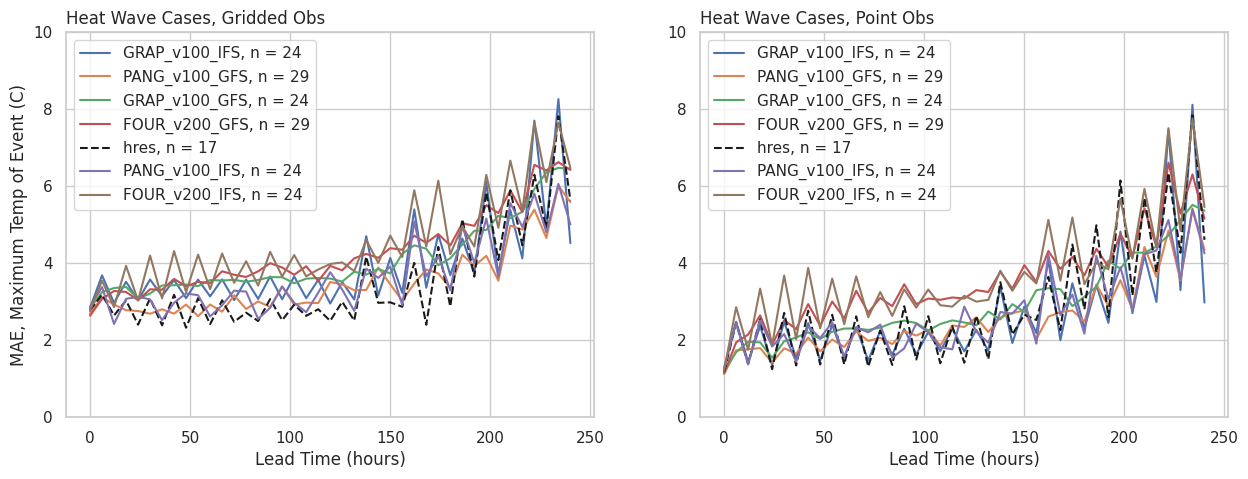

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(1,2,figsize=(15,5))

for case_file in heatwave_cases:
    with open(case_file, 'rb') as f:
        case = pickle.load(f)
    # Initialize counters for this case file
    model_name = case_file.split('.')[0]
    results = {
        'total_cases': 0,
        'gridded_non_none': 0,
        'point_non_none': 0,
        'both_non_none': 0
    }
    
    # Count total cases and those with non-None values
    if 'heat_wave' in case:
        results['total_cases'] = len(case['heat_wave'])
        
        for case_id, case_data in case['heat_wave'].items():
            if 'surface_air_temperature' in case_data:
                temp_data = case_data['surface_air_temperature']
                
                # Check if gridded metrics are non-None
                has_gridded = any(metric is not None for metric in temp_data.get('gridded', {}).values())
                
                # Check if point metrics are non-None
                has_point = any(metric is not None for metric in temp_data.get('point', {}).values())
                
                if has_gridded:
                    results['gridded_non_none'] += 1
                
                if has_point:
                    results['point_non_none'] += 1
                
                if has_gridded and has_point:
                    results['both_non_none'] += 1  
    name = '_'.join(case_file.split('_')[2:5]).split('.')[0]
    if name == 'FOUR_v100_GFS':
        continue
    gridded_list=[]
    point_list=[]
    case_ids = np.arange(0,len(case['heat_wave']))
    if results['both_non_none'] == 0:
        continue
    for n in case['heat_wave']:
        if case['heat_wave'][n]['surface_air_temperature']['gridded']['MaximumMAE'] is not None:
            gridded_list.append(case['heat_wave'][n]['surface_air_temperature']['gridded']['MaximumMAE'])
        if case['heat_wave'][n]['surface_air_temperature']['point']['MaximumMAE'] is not None:
            point_list.append(case['heat_wave'][n]['surface_air_temperature']['point']['MaximumMAE'])
    gridded_da = xr.concat(gridded_list,np.arange(0,len(gridded_list)),)
    point_da = xr.concat(point_list,np.arange(0,len(point_list)),)

    if name == 'hres':
        gridded_da.mean('concat_dim').plot(ax=ax[0], label=f'{name}, n = {results['both_non_none']}', color='k', linestyle='--')
        point_da.mean('concat_dim').plot(ax=ax[1], label=f'{name}, n = {results['both_non_none']}', color='k', linestyle='--')
        continue  # Skip the default plotting below for hres    
    gridded_da.mean('concat_dim').plot(ax=ax[0],label=f'{name}, n = {results['both_non_none']}')
    point_da.mean('concat_dim').plot(ax=ax[1],label=f'{name}, n = {results['both_non_none']}')
    # Add special formatting for HRES model

for axis in ax:
    axis.set_ylim(0,10)
ax[0].set_ylabel('MAE, Maximum Temp of Event (C)')
ax[1].set_ylabel('')
ax[0].set_xlabel('Lead Time (hours)')
ax[1].set_xlabel('Lead Time (hours)')
ax[0].set_title('Heat Wave Cases, Gridded Obs', loc='left')
ax[1].set_title('Heat Wave Cases, Point Obs', loc='left')
ax[0].legend()
ax[1].legend()
plt.show()


In [15]:
def view_nested_keys(data, indent=0):
    """Recursively prints keys of a nested dictionary."""
    if isinstance(data, dict):
        for key in data:
            print('  ' * indent + str(key))
            view_nested_keys(data[key], indent + 1)
    elif isinstance(data, list):
        for item in data:
            view_nested_keys(item, indent)

view_nested_keys(cases)


heat_wave
  1
    surface_air_temperature
      gridded
        MaxOfMinTempMAE
        RegionalRMSE
        MaximumMAE
      point
        MaxOfMinTempMAE
        RegionalRMSE
        MaximumMAE
  2
    surface_air_temperature
      gridded
        MaxOfMinTempMAE
        RegionalRMSE
        MaximumMAE
      point
        MaxOfMinTempMAE
        RegionalRMSE
        MaximumMAE
  3
    surface_air_temperature
      gridded
        MaxOfMinTempMAE
        RegionalRMSE
        MaximumMAE
      point
        MaxOfMinTempMAE
        RegionalRMSE
        MaximumMAE
  4
    surface_air_temperature
      gridded
        MaxOfMinTempMAE
        RegionalRMSE
        MaximumMAE
      point
        MaxOfMinTempMAE
        RegionalRMSE
        MaximumMAE
  5
    surface_air_temperature
      gridded
        MaxOfMinTempMAE
        RegionalRMSE
        MaximumMAE
      point
        MaxOfMinTempMAE
        RegionalRMSE
        MaximumMAE
  6
    surface_air_temperature
      gridded
        MaxOfM